In [1]:
import re
import nltk

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79165\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Представление и предобработка текстовых данных в виде последовательностей

1.1 Представьте первое предложение из строки `text` как последовательность из индексов слов, входящих в это предложение

In [2]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
words = np.unique(word_tokenize(text.lower()))
words_dict = {v:k for v,k in zip(words, list(range(len(words))))}
words_dict

{'.': 0,
 'and': 1,
 'available': 2,
 'c++': 3,
 'command': 4,
 'currently': 5,
 'for': 6,
 'install': 7,
 'is': 8,
 'libtorch': 9,
 'most': 10,
 'note': 11,
 'of': 12,
 'only': 13,
 'preferences': 14,
 'pytorch': 15,
 'represents': 16,
 'run': 17,
 'select': 18,
 'stable': 19,
 'supported': 20,
 'tested': 21,
 'that': 22,
 'the': 23,
 'version': 24,
 'your': 25}

In [5]:
first_sent =[words_dict[word] for word in word_tokenize(sent_tokenize(text.lower())[0])]
first_sent

[18, 25, 14, 1, 17, 23, 7, 4, 0]

1.2 Представьте первое предложение из строки `text` как последовательность векторов, соответствующих индексам слов. Для представления индекса в виде вектора используйте унитарное кодирование. В результате должен получиться двумерный тензор размера `количество слов в предложении` x `количество уникальных слов`

In [6]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

In [7]:
first_sent = []
for word in word_tokenize(sent_tokenize(text.lower())[0]):
    s = [0]*len(words_dict)
    s[words_dict[word]] = 1
    first_sent.append(s)
    
print(*first_sent, sep='\n')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


1.3 Решите задачу 1.2, используя модуль `nn.Embedding`

In [8]:
first_sent = torch.tensor([words_dict[word] for word in word_tokenize(sent_tokenize(text.lower())[0])])
emb_layer = nn.Embedding(len(words_dict), len(words_dict))
word_vectors = emb_layer(torch.LongTensor(first_sent))

In [9]:
first_sent

tensor([18, 25, 14,  1, 17, 23,  7,  4,  0])

In [10]:
word_vectors

tensor([[ 1.3914e+00, -5.6043e-01, -1.1521e+00,  1.8756e+00, -1.3022e+00,
          4.0864e-01,  3.5669e-01, -2.7680e-01, -4.5750e-01, -1.3056e+00,
          1.0375e-01,  9.3072e-01, -3.5634e-01,  1.0211e-01,  1.6182e+00,
          5.1910e-01, -1.6228e+00,  3.2385e-01,  4.3317e-01,  3.8275e-01,
          1.2510e+00,  3.4461e-01,  2.7369e-01,  1.0658e+00,  2.5561e-01,
         -3.7500e-01],
        [ 3.3999e-01, -2.9828e-01,  9.2082e-01,  1.2247e+00,  3.4142e-01,
         -1.6575e+00,  1.0769e+00,  8.1582e-01,  9.8012e-02, -8.4449e-01,
          1.2632e-01,  4.1608e-01, -1.2835e-01,  1.1843e+00, -9.2180e-02,
          1.8324e+00, -1.4125e-01,  1.1326e-01,  4.1805e-01,  1.3635e+00,
         -1.6646e+00, -6.7045e-01,  5.1979e-02,  7.7013e-01, -1.1363e-01,
         -2.8606e+00],
        [-1.5988e+00, -1.5435e-01,  6.3162e-01, -7.2535e-01,  1.5560e+00,
          7.7937e-01, -1.8335e+00,  5.8090e-01, -1.8319e-02,  1.3484e+00,
          1.4881e+00, -1.6838e+00,  6.8659e-01, -6.8856e-01,  1.21

## 2. Классификация фамилий по национальности (ConvNet)

Датасет: https://disk.yandex.ru/d/owHew8hzPc7X9Q?w=1

2.1 Считать файл `surnames/surnames.csv`. 

2.2 Закодировать национальности числами, начиная с 0.

2.3 Разбить датасет на обучающую и тестовую выборку

2.4 Реализовать класс `Vocab` (токен = __символ__)
  * добавьте в словарь специальный токен `<PAD>` с индексом 0
  * при создании словаря сохраните длину самой длинной последовательности из набора данных в виде атрибута `max_seq_len`

2.5 Реализовать класс `SurnamesDataset`
  * метод `__getitem__` возвращает пару: <последовательность индексов токенов (см. 1.1 ), номер класса> 
  * длина каждой такой последовательности должна быть одинаковой и равной `vocab.max_seq_len`. Чтобы добиться этого, дополните последовательность справа индексом токена `<PAD>` до нужной длины

2.6. Обучить классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding`. Рассмотрите два варианта: 
    - когда токен представляется в виде унитарного вектора и модуль `nn.Embedding` не обучается
    - когда токен представляется в виде вектора небольшой размерности (меньше, чем размер словаря) и модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

In [457]:
df = pd.read_csv('surnames.csv')
df.head()

,surname,nationality
0,Woodford,English
1,Coté,French
2,Kore,English
3,Koury,Arabic
4,Lebzak,Russian


In [458]:
le = LabelEncoder()
le.fit(df.nationality)

LabelEncoder()

In [459]:
df['coder'] = le.fit_transform(df.nationality.values)
df.head()

,surname,nationality,coder
0,Woodford,English,4
1,Coté,French,5
2,Kore,English,4
3,Koury,Arabic,0
4,Lebzak,Russian,14


In [460]:
class Vocab:
  def __init__(self, data):
    self.idx_to_token = dict()
    self.token_to_idx = dict()
    self.token_to_idx['<PAD>'] = 0
    self.idx_to_token[0] = '<PAD>'
    self.max_seq_len = 0
    k = 1
    for sur in data.values:
        for w in sur.lower():
            if w not in self.token_to_idx:
                self.token_to_idx[w] = k
                self.idx_to_token[k] = w
                k+=1
        if len(sur)>self.max_seq_len:
                self.max_seq_len = len(sur)
    self.vocab_len = len(self.idx_to_token)

In [461]:
vocab = Vocab(df.surname)

In [462]:
class SurnamesDataset(Dataset):
  def __init__(self, X, y, vocab):
    self.X = X
    self.y = y
    self.vocab = vocab

  def vectorize(self, surname):
    '''Генерирует представление фамилии surname в при помощи бинарного кодирования (см. 1.2)'''
    surname_rep = []
    for sur in surname:
        rep = []
        for w in sur.lower():
            rep.append(self.vocab.token_to_idx[w])
        surname_rep.append(torch.tensor(rep+[0]*(vocab.max_seq_len-len(rep))))
    self.X_rep = torch.stack(surname_rep)
    
  def __len__(self):
    return len(self.X_rep)

  def __getitem__(self, idx):
    sample = self.X_rep[idx], self.y[idx]
    return sample

In [556]:
dataset = SurnamesDataset(df.surname, df.coder, vocab)
dataset.vectorize(df.surname.values)

In [557]:
z = next(iter(dataset))
z

(tensor([1, 2, 2, 3, 4, 2, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 4)

In [558]:
data_train, data_test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

In [559]:
train_loader = DataLoader(data_train, batch_size = 50, shuffle = True)
test_loader = DataLoader(data_test, batch_size = 50, shuffle = True)

In [560]:
vocab.max_seq_len

17

In [561]:
emb = nn.Embedding(vocab.vocab_len, vocab.vocab_len)
ex1 = emb(torch.LongTensor(z[0])).view(1,vocab.vocab_len,17)
print('ex1:', ex1.shape)

conv1 = nn.Conv1d(vocab.vocab_len, 64, kernel_size=3)
ex2 = F.max_pool1d(conv1(ex1), 2)
print('ex2:', ex2.shape)

conv2 = nn.Conv1d(64, 128, kernel_size=3)
ex3 = conv2(ex2)
print('ex3:', ex3.shape)
ex4 = F.max_pool1d(ex3, 2)
print('ex4:', ex4.shape)

ex1: torch.Size([1, 56, 17])
ex2: torch.Size([1, 64, 7])
ex3: torch.Size([1, 128, 5])
ex4: torch.Size([1, 128, 2])


In [562]:
max(df.coder)

17

In [563]:
losses = []

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv1d(vocab.vocab_len, 64, kernel_size=3)
    self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
    self.conv2_drop = nn.Dropout1d() 
    self.fc1 = nn.Linear(128*2, 18)
    self.emb = nn.Embedding(vocab.vocab_len, vocab.vocab_len)
    self.emb.requires_grad = False
    
  def forward(self, X):
    X = self.emb(torch.LongTensor(X)).view(X.shape[0],vocab.vocab_len,17)
    X = F.relu(F.max_pool1d(self.conv1(X), 2)) # первый сверточный слой
    X = F.relu(F.max_pool1d(self.conv2_drop(self.conv2(X)), 2)) # второй сверточный слой
    X = X.view(-1, 1*128*2)
    X = F.dropout(X, 0.4)
    y_pred = self.fc1(X) #  полносвязный слой
    return y_pred

model = Model()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for i in range(31):
    model.train()
    losses_epoch_train = []
    losses_epoch_test = []
    y_pred_test = []
    y_true_test = []
    for x_example, y_example in train_loader:
        y_pred = model(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_train.append(loss.item())
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
    for x_example, y_example in test_loader:
        y_pred = model(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_test.append(loss.item())
        
        y_pred_test.extend(y_pred)
        y_true_test.extend(y_example)
    
    train_losses.append(np.mean(losses_epoch_train))
    test_losses.append(np.mean(losses_epoch_test))
    y_pred_test = list(map(lambda x: torch.argmax(x).item(), y_pred_test))
    y_true_test = list(map(lambda x: x.item(), y_true_test))
    if i%5==0:
        print(f'epoch {i}: train_loss = {np.mean(losses_epoch_train):.8f}, test_loss = {np.mean(losses_epoch_test):.8f}') 
        print('Точность на тестовой выборке:', accuracy_score(y_true_test, y_pred_test))

epoch 0: train_loss = 2.11306106, test_loss = 1.90589772
Точность на тестовой выборке: 0.45719489981785066
epoch 5: train_loss = 1.25793629, test_loss = 1.33429688
Точность на тестовой выборке: 0.610655737704918
epoch 10: train_loss = 1.01207578, test_loss = 1.25003419
Точность на тестовой выборке: 0.6580145719489982
epoch 15: train_loss = 0.86290344, test_loss = 1.20120256
Точность на тестовой выборке: 0.6753187613843351
epoch 20: train_loss = 0.77602551, test_loss = 1.24992258
Точность на тестовой выборке: 0.6680327868852459
epoch 25: train_loss = 0.69926194, test_loss = 1.24294336
Точность на тестовой выборке: 0.6734972677595629
epoch 30: train_loss = 0.64899747, test_loss = 1.29250339
Точность на тестовой выборке: 0.6816939890710383


In [564]:
y_pred = []
y_true = []
for x,y in test_loader:
    y_pred.extend(model(x))
    y_true.extend(y)
y_pred = list(map(lambda x: torch.argmax(x).item(), y_pred))
y_true = list(map(lambda x: x.item(), y_true))

In [565]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

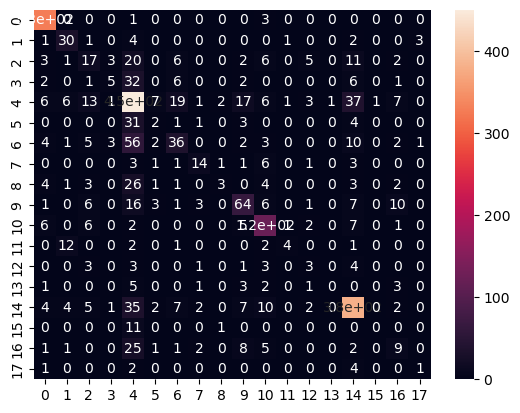

In [566]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [567]:
from sklearn.metrics import accuracy_score
print('Точность на тестовой выборке:', accuracy_score(y_true, y_pred))

Точность на тестовой выборке: 0.6707650273224044


In [568]:
surname = pd.Series(['filimonova','dubrovskaya','akhmad'])
dataset.vectorize(surname)

In [575]:
y_pred = []
for x,y in dataset:
    y_pred.append(model(x.reshape(1,x.shape[0])))
y_pred_p = [y.argsort() for y in y_pred]

In [576]:
coder_rev = dict(zip(df.coder.values,df.nationality.values))

In [577]:
for i in range(3):
    y = y_pred_p[i]
    print('Фамилия:',surname[i],'три национальности:')
    print('Наиболее вероятно:', coder_rev[y[0][-1].item()])
    print('Вторая вероятность:', coder_rev[y[0][-2].item()])
    print('Третья вероятность:', coder_rev[y[0][-3].item()])
    print("")

Фамилия: filimonova три национальности:
Наиболее вероятно: Russian
Вторая вероятность: Japanese
Третья вероятность: Czech

Фамилия: dubrovskaya три национальности:
Наиболее вероятно: Russian
Вторая вероятность: Greek
Третья вероятность: Czech

Фамилия: akhmad три национальности:
Наиболее вероятно: Arabic
Вторая вероятность: English
Третья вероятность: Scottish



In [716]:
dataset = SurnamesDataset(df.surname, df.coder, vocab)
dataset.vectorize(df.surname.values)

In [717]:
z = next(iter(dataset))
z

(tensor([1, 2, 2, 3, 4, 2, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 4)

In [718]:
data_train, data_test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), len(dataset) - int(len(dataset)*0.8)])

In [719]:
train_loader = DataLoader(data_train, batch_size = 50, shuffle = True)
test_loader = DataLoader(data_test, batch_size = 50, shuffle = True)

In [720]:
emb = nn.Embedding(vocab.vocab_len, 20)
ex1 = emb(torch.LongTensor(z[0])).view(1,20,17)
print('ex1:', ex1.shape)

conv1 = nn.Conv1d(20, 64, kernel_size=3)
ex2 = F.max_pool1d(conv1(ex1), 2)
print('ex2:', ex2.shape)

conv2 = nn.Conv1d(64, 128, kernel_size=3)
ex3 = conv2(ex2)
print('ex3:', ex3.shape)
ex4 = F.max_pool1d(ex3, 2)
print('ex4:', ex4.shape)

ex1: torch.Size([1, 20, 17])
ex2: torch.Size([1, 64, 7])
ex3: torch.Size([1, 128, 5])
ex4: torch.Size([1, 128, 2])


In [721]:
losses = []

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv1d(20, 64, kernel_size=3)
    self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
    self.conv2_drop = nn.Dropout1d() 
    self.fc1 = nn.Linear(128*2, 18)
    self.emb = nn.Embedding(vocab.vocab_len, 20)
    self.emb.requires_grad = True
    
  def forward(self, X):
    X = self.emb(torch.LongTensor(X)).view(X.shape[0],20,17)
    X = F.relu(F.max_pool1d(self.conv1(X), 2)) # первый сверточный слой
    X = F.relu(F.max_pool1d(self.conv2_drop(self.conv2(X)), 2)) # второй сверточный слой
    X = X.view(-1, 1*128*2)
    X = F.dropout(X, 0.4)
    y_pred = self.fc1(X) #  полносвязный слой
    return y_pred

model2 = Model()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

train_losses = []
test_losses = []

for i in range(31):
    model2.train()
    losses_epoch_train = []
    losses_epoch_test = []
    y_pred_test = []
    y_true_test = []
    for x_example, y_example in train_loader:
        y_pred = model2(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_train.append(loss.item())
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
    for x_example, y_example in test_loader:
        y_pred = model2(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_test.append(loss.item())
        
        y_pred_test.extend(y_pred)
        y_true_test.extend(y_example)
    
    train_losses.append(np.mean(losses_epoch_train))
    test_losses.append(np.mean(losses_epoch_test))
    y_pred_test = list(map(lambda x: torch.argmax(x).item(), y_pred_test))
    y_true_test = list(map(lambda x: x.item(), y_true_test))
    if i%5==0:
        print(f'epoch {i}: train_loss = {np.mean(losses_epoch_train):.8f}, test_loss = {np.mean(losses_epoch_test):.8f}') 
        print('Точность на тестовой выборке:', accuracy_score(y_true_test, y_pred_test))

epoch 0: train_loss = 2.15252228, test_loss = 1.99982691
Точность на тестовой выборке: 0.41712204007285975
epoch 5: train_loss = 1.46968767, test_loss = 1.48883727
Точность на тестовой выборке: 0.5746812386156649
epoch 10: train_loss = 1.23309033, test_loss = 1.37111439
Точность на тестовой выборке: 0.6188524590163934
epoch 15: train_loss = 1.10791192, test_loss = 1.25613671
Точность на тестовой выборке: 0.6416211293260473
epoch 20: train_loss = 1.00810896, test_loss = 1.24035742
Точность на тестовой выборке: 0.6461748633879781
epoch 25: train_loss = 0.94350581, test_loss = 1.24891924
Точность на тестовой выборке: 0.6552823315118397
epoch 30: train_loss = 0.89727139, test_loss = 1.25265265
Точность на тестовой выборке: 0.6461748633879781


In [722]:
y_pred = []
y_true = []
for x,y in test_loader:
    y_pred.extend(model2(x))
    y_true.extend(y)
y_pred = list(map(lambda x: torch.argmax(x).item(), y_pred))
y_true = list(map(lambda x: x.item(), y_true))

In [723]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

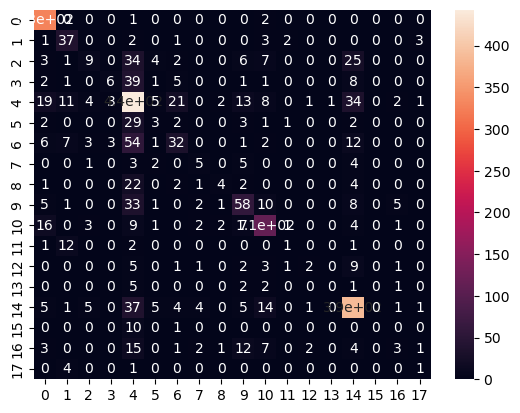

In [724]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [725]:
from sklearn.metrics import accuracy_score
print('Точность на тестовой выборке:', accuracy_score(y_true, y_pred))

Точность на тестовой выборке: 0.6516393442622951


In [726]:
surname = pd.Series(['filimonova','dubrovskaya','akhmad'])
dataset.vectorize(surname)

In [730]:
y_pred = []
for x,y in dataset:
    y_pred.append(model2(x.reshape(1,x.shape[0])))
y_pred_p = [y.argsort() for y in y_pred]

In [731]:
coder_rev = dict(zip(df.coder.values,df.nationality.values))

In [732]:
for i in range(3):
    y = y_pred_p[i]
    print('Фамилия:',surname[i],'три национальности:')
    print('Наиболее вероятно:', coder_rev[y[0][-1].item()])
    print('Вторая вероятность:', coder_rev[y[0][-2].item()])
    print('Третья вероятность:', coder_rev[y[0][-3].item()])
    print("")

Фамилия: filimonova три национальности:
Наиболее вероятно: Russian
Вторая вероятность: Greek
Третья вероятность: Spanish

Фамилия: dubrovskaya три национальности:
Наиболее вероятно: Russian
Вторая вероятность: Czech
Третья вероятность: Italian

Фамилия: akhmad три национальности:
Наиболее вероятно: Arabic
Вторая вероятность: Japanese
Третья вероятность: English



## 3. Классификация обзоров на фильмы (ConvNet)

Датасет: https://disk.yandex.ru/d/tdinpb0nN_Dsrg

2.1 Создайте набор данных на основе файлов polarity/positive_reviews.csv (положительные отзывы) и polarity/negative_reviews.csv (отрицательные отзывы). Разбейте на обучающую и тестовую выборку.
  * токен = __слово__
  * данные для обучения в датасете представляются в виде последовательности индексов токенов
  * словарь создается на основе _только_ обучающей выборки. Для корректной обработки ситуаций, когда в тестовой выборке встретится токен, который не хранится в словаре, добавьте в словарь специальный токен `<UNK>`
  * добавьте предобработку текста

2.2. Обучите классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding` 
    - подберите адекватную размерность вектора эмбеддинга: 
    - модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`


2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)
* Целевое значение accuracy на валидации - 70+%

In [9]:
df_positive = pd.read_table('positive_reviews.txt', header = None)
df_positive.columns = ['review']
df_positive['target'] = 0
df_positive.head()

,review,target
0,the rock is destined to be the 21st century's ...,0
1,"the gorgeously elaborate continuation of "" the...",0
2,effective but too-tepid biopic,0
3,if you sometimes like to go to the movies to h...,0
4,"emerges as something rare , an issue movie tha...",0


In [10]:
df_negative = pd.read_table('negative_reviews.txt', header = None)
df_negative.columns = ['review']
df_negative['target'] = 1
df_negative.head()

,review,target
0,"simplistic , silly and tedious .",1
1,"it's so laddish and juvenile , only teenage bo...",1
2,exploitative and largely devoid of the depth o...,1
3,[garbus] discards the potential for pathologic...,1
4,a visually flashy but narratively opaque and e...,1


In [149]:
df = pd.concat([df_positive, df_negative], ignore_index = True).sample(frac=1).reset_index(drop=True)
df

,review,target
0,the niftiest trick perpetrated by the importan...,1
1,cho's fans are sure to be entertained ; it's o...,1
2,"unofficially , national lampoon's van wilder i...",1
3,serry does a fine job of capturing the climate...,1
4,"rarely , a movie is more than a movie . go .",0
...,...,...
10657,despite the fact that this film wasn't as bad ...,1
10658,the movie's quiet affirmation of neighborhood ...,0
10659,"the re- enactments , however fascinating they ...",1
10660,"the year's greatest adventure , and jackson's ...",0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, test_size=0.2, random_state=1)

In [151]:
sum(y_train)/len(y_train)

0.4961894712158518

In [152]:
sum(y_test)/len(y_test)

0.5152367557430848

In [153]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z.,|?]', r' ',text)
    return text

In [154]:
class Vocab:
  def __init__(self, data):
    self.idx_to_token = dict()
    self.token_to_idx = dict()
    self.idx_to_token[0] = '<UNK>'
    self.token_to_idx['<UNK>'] = 0
    k = 1
    self.max_len = 100
    for sur in data.values:
        for w in word_tokenize(preprocess_text(sur[0])):
            if w not in self.token_to_idx:
                self.token_to_idx[w] = k
                self.idx_to_token[k] = w
                k+=1
#         if len(word_tokenize(preprocess_text(sur[0])))>self.max_len:
#             self.max_len = len(word_tokenize(preprocess_text(sur[0])))
    self.vocab_len = len(self.idx_to_token)
    

In [155]:
vocab = Vocab(X_train)

In [156]:
vocab.token_to_idx

{'<UNK>': 0,
 'dull': 1,
 'and': 2,
 'mechanical': 3,
 ',': 4,
 'kinda': 5,
 'like': 6,
 'a': 7,
 'very': 8,
 'goofy': 9,
 'museum': 10,
 'exhibit': 11,
 'well': 12,
 'made': 13,
 'but': 14,
 'doesn': 15,
 't': 16,
 'generate': 17,
 'lot': 18,
 'of': 19,
 'tension': 20,
 '.': 21,
 'no': 22,
 'big': 23,
 'whoop': 24,
 'nothing': 25,
 'new': 26,
 'to': 27,
 'see': 28,
 'zero': 29,
 'thrills': 30,
 'too': 31,
 'many': 32,
 'flashbacks': 33,
 'choppy': 34,
 'ending': 35,
 'make': 36,
 'for': 37,
 'bad': 38,
 'film': 39,
 'nair': 40,
 's': 41,
 'cast': 42,
 'is': 43,
 'so': 44,
 'large': 45,
 'it': 46,
 'altman': 47,
 'esque': 48,
 'she': 49,
 'deftly': 50,
 'spins': 51,
 'the': 52,
 'multiple': 53,
 'stories': 54,
 'in': 55,
 'vibrant': 56,
 'intoxicating': 57,
 'fashion': 58,
 'uneven': 59,
 'movie': 60,
 'does': 61,
 'have': 62,
 'its': 63,
 'charms': 64,
 'funny': 65,
 'moments': 66,
 'not': 67,
 'quite': 68,
 'enough': 69,
 'them': 70,
 'merchant': 71,
 'hasn': 72,
 'directed': 73,
 't

In [157]:
vocab.max_len

100

In [158]:
class ReviewDataset(Dataset):
  def __init__(self, X, y, vocab):
    self.X = X
    self.y = y
    self.vocab = vocab

  def vectorize(self, review):
    '''Генерирует представление отзыва review при помощи бинарного кодирования (см. 1.2)'''
    review_rep = []
    for rev in review:
        rep = []
        for w in word_tokenize(preprocess_text(rev[0])):
            if w in vocab.token_to_idx:
                rep.append(vocab.token_to_idx[w])
            else:
                rep.append(0)
        review_rep.append(torch.tensor(rep+[0]*(vocab.max_len-len(rep))))
    self.X_rep = torch.stack(review_rep)
    
  def __len__(self):
    return len(self.X_rep)

  def __getitem__(self, idx):
    sample = self.X_rep[idx], self.y.values[idx]
    return sample

In [159]:
data_train = ReviewDataset(X_train, y_train, vocab)
data_train.vectorize(X_train.values)

In [160]:
data_test = ReviewDataset(X_test, y_test, vocab)
data_test.vectorize(X_test.values)

In [161]:
train_loader = DataLoader(data_train, batch_size = 50, shuffle = True)
test_loader = DataLoader(data_test, batch_size = 50, shuffle = True)

In [162]:
vocab.vocab_len

16406

In [163]:
vocab.max_len

100

In [164]:
z = next(iter(data_train))
z

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 1)

In [165]:
emb = nn.Embedding(vocab.vocab_len, 50)
ex1 = emb(torch.LongTensor(z[0])).view(1,50,100)
print('ex1:', ex1.shape)

conv1 = nn.Conv1d(50, 64, kernel_size=3)
ex2 = F.max_pool1d(conv1(ex1), 2)
print('ex2:', ex2.shape)

conv2 = nn.Conv1d(64, 70, kernel_size=3)
ex3 = conv2(ex2)
print('ex3:', ex3.shape)
ex4 = F.max_pool1d(ex3, 2)
print('ex4:', ex4.shape)

ex1: torch.Size([1, 50, 100])
ex2: torch.Size([1, 64, 49])
ex3: torch.Size([1, 70, 47])
ex4: torch.Size([1, 70, 23])


In [166]:
losses = []

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv1d(50, 64, kernel_size=3)
    self.conv2 = nn.Conv1d(64, 70, kernel_size=3)
    self.conv2_drop = nn.Dropout1d(0.2) 
    self.fc1 = nn.Linear(1*70*23, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128,2)
    self.emb = nn.Embedding(vocab.vocab_len, 50)
    self.emb.requires_grad = True
    
  def forward(self, X):
    X = self.emb(torch.LongTensor(X)).view(X.shape[0],50,100)
    X = F.relu(F.max_pool1d(self.conv2_drop(self.conv1(X)), 2)) # первый сверточный слой
    X = F.relu(F.max_pool1d(self.conv2_drop(self.conv2(X)), 2)) # первый сверточный слой
    X = X.view(-1, 1*70*23)
    X = F.dropout(X, 0.4)
    X = F.dropout(nn.ReLU()(self.fc1(X)), 0.25) # первый полносвязный слой
    X = F.dropout(nn.ReLU()(self.fc2(X)), 0.2) # первый полносвязный слой
    y_pred = self.fc3(X) # третий полносвязный слой
    return y_pred

model2 = Model()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.0005)

train_losses = []
test_losses = []

for i in range(25):
    model2.train()
    losses_epoch_train = []
    losses_epoch_test = []
    y_pred_test = []
    y_true_test = []
    for x_example, y_example in train_loader:
        y_pred = model2(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_train.append(loss.item())
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
    for x_example, y_example in test_loader:
        y_pred = model2(x_example)
    
        loss = criterion(y_pred, y_example.long())
        losses_epoch_test.append(loss.item())
        
        y_pred_test.extend(y_pred)
        y_true_test.extend(y_example)
    
    train_losses.append(np.mean(losses_epoch_train))
    test_losses.append(np.mean(losses_epoch_test))
    y_pred_test = list(map(lambda x: torch.argmax(x).item(), y_pred_test))
    y_true_test = list(map(lambda x: x.item(), y_true_test))
    print(f'epoch {i}: train_loss = {np.mean(losses_epoch_train):.8f}, test_loss = {np.mean(losses_epoch_test):.8f}') 
    print('Точность на тестовой выборке:', accuracy_score(y_true_test, y_pred_test))
    if accuracy_score(y_true_test, y_pred_test)>0.7:
        break

epoch 0: train_loss = 0.69471183, test_loss = 0.69374555
Точность на тестовой выборке: 0.49507735583684953
epoch 1: train_loss = 0.69360376, test_loss = 0.69293323
Точность на тестовой выборке: 0.5058602906704173
epoch 2: train_loss = 0.69305710, test_loss = 0.69579645
Точность на тестовой выборке: 0.483356774496015
epoch 3: train_loss = 0.69319693, test_loss = 0.69460629
Точность на тестовой выборке: 0.4866385372714487
epoch 4: train_loss = 0.69325252, test_loss = 0.69538207
Точность на тестовой выборке: 0.48148148148148145
epoch 5: train_loss = 0.69299852, test_loss = 0.69275366
Точность на тестовой выборке: 0.5142991092358181
epoch 6: train_loss = 0.69207950, test_loss = 0.68985604
Точность на тестовой выборке: 0.5349273323956868
epoch 7: train_loss = 0.68700361, test_loss = 0.68560568
Точность на тестовой выборке: 0.5588373183309893
epoch 8: train_loss = 0.67693610, test_loss = 0.69378558
Точность на тестовой выборке: 0.5461790904828879
epoch 9: train_loss = 0.65586849, test_loss =

In [175]:
y_pred = []
y_true = []
for x,y in test_loader:
    y_pred.extend(model2(x))
    y_true.extend(y)
y_pred = list(map(lambda x: torch.argmax(x).item(), y_pred))
y_true = list(map(lambda x: x.item(), y_true))

In [176]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

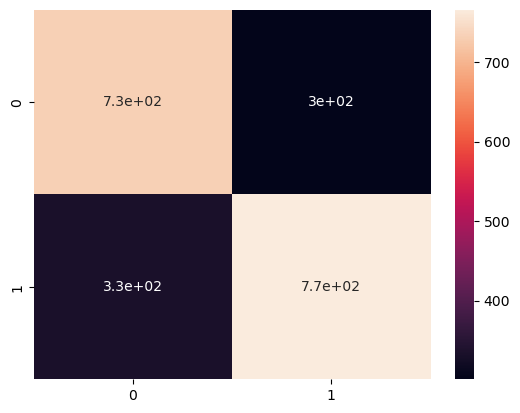

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [178]:
from sklearn.metrics import accuracy_score
print('Точность на тестовой выборке:', accuracy_score(y_true, y_pred))

Точность на тестовой выборке: 0.7027660571964369


In [179]:
surname = pd.Series([['very cool movie! I advise everyone to watch this amazing movie!'],['it was boring and just awful! I do not advise anyone to watch this movie']])
data_test.vectorize(surname)

In [190]:
y_pred = []
for x,y in data_test:
    y_pred.append(model2(x.reshape(1,x.shape[0])))

In [191]:
for i in range(2):
    y = y_pred[i]
    print('Отзыв:',surname[i])
    if y.argmax()==1:
        print('С вероятностью ', max(nn.Softmax(dim = 0)(y.float()[0])).item(), 'отрицательный отзыв')
    else:
        print('С вероятностью ', max(nn.Softmax(dim = 0)(y.float()[0])).item(), 'положительный отзыв')

Отзыв: ['very cool movie! I advise everyone to watch this amazing movie!']
С вероятностью  0.8244079351425171 положительный отзыв
Отзыв: ['it was boring and just awful! I do not advise anyone to watch this movie']
С вероятностью  0.9970511198043823 отрицательный отзыв
